#### Simulating Sensor Data
Since I don't have the sensor data stream, lets try to simulate

In [1]:
import numpy as py
import pandas as pd
import json
from datetime import datetime
import time
import psutil
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

In [3]:
sensordata=[]
sensor = pd.read_json('D:\Vito\Work Prep\CADIT\sensor_data.json')
for i in range(1440):
    sensorid = sensor['array'][i]['id']
    timestamp = sensor['array'][i]['timestamp']/1000
    timestamp = datetime.fromtimestamp(timestamp).strftime('%d-%m-%y')
    roomArea = sensor['array'][i]['roomArea']
    temperature = sensor['array'][i]['temperature']
    humidity = sensor['array'][i]['humidity']
    sensordata.append([sensorid, timestamp, roomArea, temperature, humidity])
sensortable = pd.DataFrame(sensordata)
sensortable.columns = ['id','timestamp', 'roomArea', 'temperature', 'humidity']

In [4]:
def write_csv(data):
    with open('output.csv', 'a') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(data)

<IPython.core.display.Javascript object>


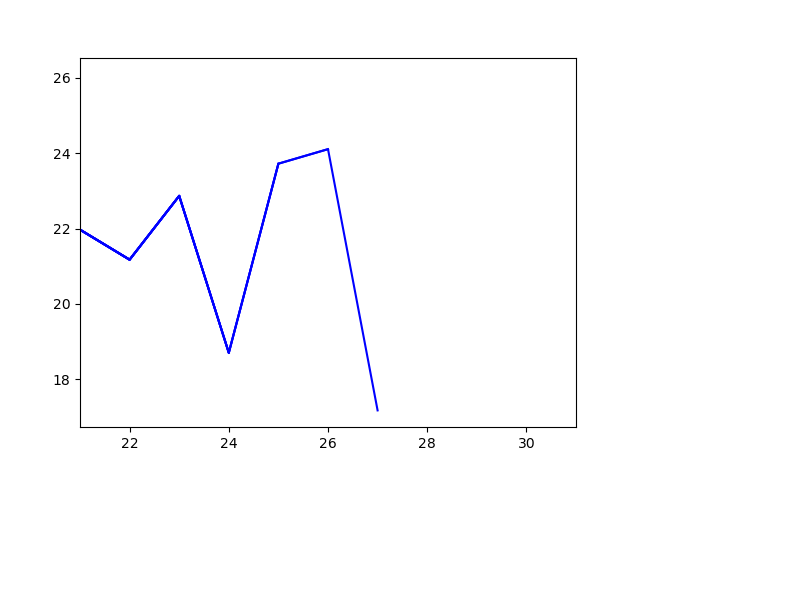

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

In [6]:
i = 0
x, y = [], []

while True:
    x.append(i)
    y.append(sensortable['temperature'][i])
    
    ax.plot(x, y, color='b')
    
    fig.canvas.draw()
    
    ax.set_xlim(left=max(0, i-5), right=i+5)
    
    ts = time.time()   
    
    write_csv([ts,sensortable['temperature'][i]])
    
    time.sleep(1) #for example-wise i use 1 second delay/push
    
    i += 1

KeyboardInterrupt: 

In [ ]:
plt.close()